Cifar-10 Project 4

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import numpy as np
import pydot
import graphviz
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

Data uploading  

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

Data Prerposessing

In [3]:
# Normalization
x_train=x_train/.255

x_test=x_test/.255

#One-hot encoding
y_train = tf.keras.utils.to_categorical(np.array(y_train))
y_test = tf.keras.utils.to_categorical(np.array(y_test))

In [4]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

In [17]:
x_train.shape

(45000, 32, 32, 3)

Model 정의(CNN 기반)

In [5]:
def get_model():
    
    model=Sequential([
        Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Flatten(),
        
        Dense(units=128,activation='relu'),
        BatchNormalization(),
        Dense(units=64,activation='relu'),
        Dropout(0.3),
        Dense(units=10,activation='softmax') 
    ])

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'],)

    return model

In [6]:
model_checkpoint_best_path=r'.\checkpoint_best_4'
model_checkpoint_best=ModelCheckpoint(filepath=model_checkpoint_best_path,monitor='val_acc',save_best_only=True,save_weights_only=True,save_freq='epoch')

early_stopping=EarlyStopping(monitor='val_acc',patience=20,min_delta=1e-4)

In [7]:
log_dir='logs\\fit\\'

In [8]:
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1,embeddings_freq=1)

In [ ]:
model.summary()

In [8]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [11]:
model=get_model()
history=model.fit(x_train,
        y_train,
        epochs=200,
        validation_data=(x_val,y_val),
        verbose=1,
        callbacks=[model_checkpoint_best,early_stopping])#,tensorboard_callback])#

Epoch 1/200
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7333 - acc: 0.3534 - val_loss: 1.4228 - val_acc: 0.4734
Epoch 2/200
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3678 - acc: 0.5088 - val_loss: 1.1227 - val_acc: 0.5980
Epoch 3/200
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1799 - acc: 0.5854 - val_loss: 1.0496 - val_acc: 0.6292
Epoch 4/200
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0586 - acc: 0.6335 - val_loss: 0.9431 - val_acc: 0.6642
Epoch 5/200
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9798 - acc: 0.6625 - val_loss: 0.8513 - val_acc: 0.6946
Epoch 6/200
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9213 - acc: 0.6859 - val_loss: 0.9111 - val_acc: 0.6872
Epoch 7/200
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8785 - acc: 0.6995 - val_loss: 0.8164 - val_acc: 0.7086
Epoch 8/200
1407/1407 [=========================

KeyboardInterrupt: 

Model 학습

In [12]:
model=get_model()
model.load_weights(model_checkpoint_best_path)
test_loss,test_acc=model.evaluate(x=x_val,y=y_val,verbose=1)

157/157 [==============================] - 6s 5ms/step - loss: 0.5900 - acc: 0.8040


In [ ]:
model.save('cifar_10_80')

Train 및 Validation acc 시각화

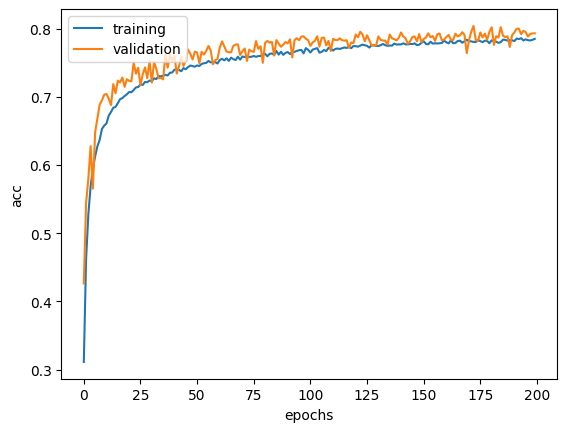

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper left')
plt.show()

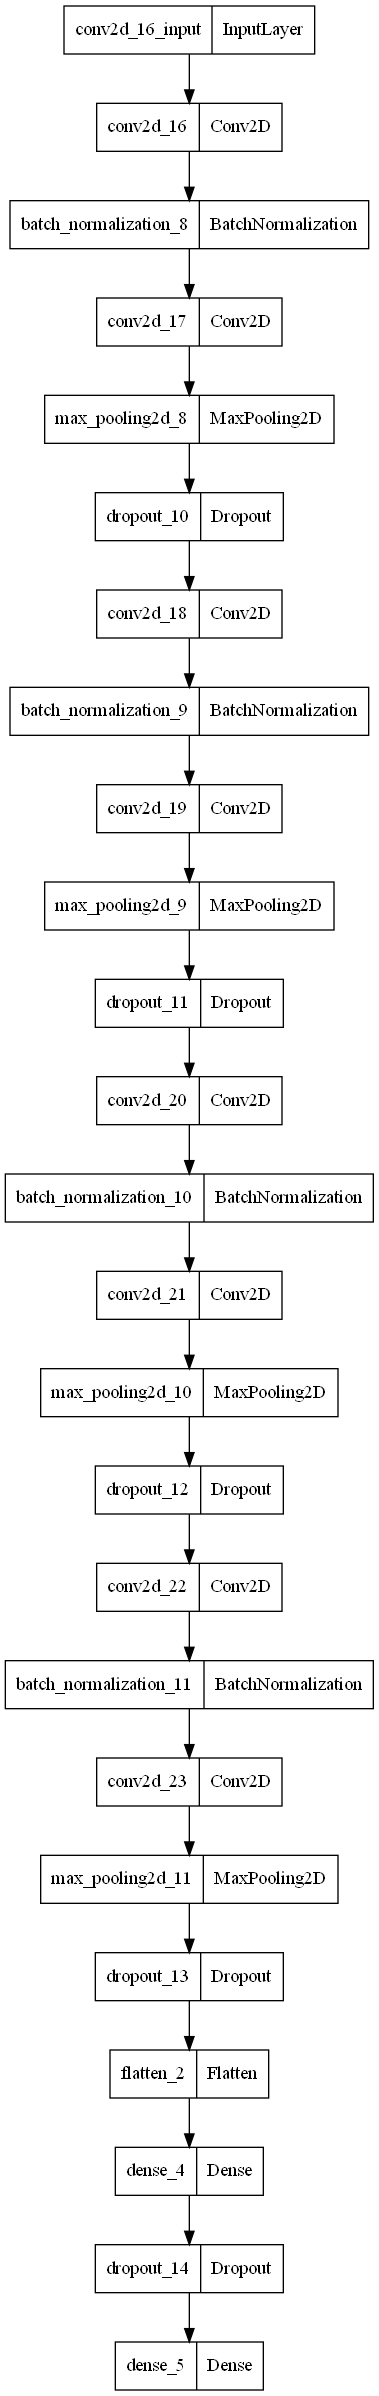

In [14]:
plot_model(model, to_file='model.png')

Test dataset 검증

In [17]:
test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.5924 - acc: 0.7991
